In [1]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [9]:
model = tf.keras.models.load_model('./0000001/')

In [5]:
type(model)

keras.engine.functional.Functional

In [12]:
from zipfile import ZipFile
import os
import cv2
import numpy as np

# with ZipFile('./drive/MyDrive/Final Year Project/Datasets/testROI.zip', 'r') as zipObj:
#    # Extract a specific file from zip file
#    zipObj.extractall('./')

testfilenames = []
images = []
for filename in sorted(os.listdir("./testROI")):
# for filename in (os.listdir("./testROI")):
    testfilenames.append(filename)
    # Read image
    img = cv2.imread(os.path.join("./testROI/",filename), 0)
    
    # Append image to list
    images.append(img)

palm_arrays = np.array(images)

In [14]:
palm_arrays = palm_arrays.astype('float32') / 255.
palm_arrays = palm_arrays.reshape(-1, 150, 150, 1)
print(palm_arrays.shape)

(30, 150, 150, 1)


In [15]:
tests = model.predict(palm_arrays)

1/1 [==============================] - 0s 450ms/step


In [16]:
testfilenames

['026_1.JPG',
 '026_2.JPG',
 '026_3.JPG',
 '026_4.JPG',
 '026_5.JPG',
 '041_1.JPG',
 '041_2.JPG',
 '041_3.JPG',
 '041_4.JPG',
 '041_5.JPG',
 '096_1.JPG',
 '096_2.JPG',
 '096_3.JPG',
 '096_4.JPG',
 '096_5.JPG',
 '114_1.JPG',
 '114_2.JPG',
 '114_3.JPG',
 '114_4.JPG',
 '114_5.JPG',
 '121_1.JPG',
 '121_2.JPG',
 '121_3.JPG',
 '121_4.JPG',
 '121_5.JPG',
 '143_1.JPG',
 '143_2.JPG',
 '143_3.JPG',
 '143_4.JPG',
 '143_5.JPG']

In [17]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=6, n_init=6)
kmeans.fit(tests)

KMeans(n_clusters=6, n_init=6)

In [24]:
for i in range(len(testfilenames)):
  print("image: ", testfilenames[i], ", cluster: ", kmeans.labels_[i])

image:  026_1.JPG , cluster:  2
image:  026_2.JPG , cluster:  2
image:  026_3.JPG , cluster:  3
image:  026_4.JPG , cluster:  3
image:  026_5.JPG , cluster:  3
image:  041_1.JPG , cluster:  2
image:  041_2.JPG , cluster:  0
image:  041_3.JPG , cluster:  2
image:  041_4.JPG , cluster:  0
image:  041_5.JPG , cluster:  2
image:  096_1.JPG , cluster:  0
image:  096_2.JPG , cluster:  3
image:  096_3.JPG , cluster:  0
image:  096_4.JPG , cluster:  3
image:  096_5.JPG , cluster:  3
image:  114_1.JPG , cluster:  5
image:  114_2.JPG , cluster:  1
image:  114_3.JPG , cluster:  1
image:  114_4.JPG , cluster:  1
image:  114_5.JPG , cluster:  1
image:  121_1.JPG , cluster:  4
image:  121_2.JPG , cluster:  4
image:  121_3.JPG , cluster:  4
image:  121_4.JPG , cluster:  4
image:  121_5.JPG , cluster:  4
image:  143_1.JPG , cluster:  1
image:  143_2.JPG , cluster:  5
image:  143_3.JPG , cluster:  2
image:  143_4.JPG , cluster:  2
image:  143_5.JPG , cluster:  2


In [25]:
#groups images by whom it belongs to
from collections import defaultdict
filename_groups = defaultdict(list)
for filename in testfilenames:
    prefix = filename.split('_')[0]
    filename_groups[prefix].append(filename)

In [26]:
filename_groups

defaultdict(list,
            {'026': ['026_1.JPG',
              '026_2.JPG',
              '026_3.JPG',
              '026_4.JPG',
              '026_5.JPG'],
             '041': ['041_1.JPG',
              '041_2.JPG',
              '041_3.JPG',
              '041_4.JPG',
              '041_5.JPG'],
             '096': ['096_1.JPG',
              '096_2.JPG',
              '096_3.JPG',
              '096_4.JPG',
              '096_5.JPG'],
             '114': ['114_1.JPG',
              '114_2.JPG',
              '114_3.JPG',
              '114_4.JPG',
              '114_5.JPG'],
             '121': ['121_1.JPG',
              '121_2.JPG',
              '121_3.JPG',
              '121_4.JPG',
              '121_5.JPG'],
             '143': ['143_1.JPG',
              '143_2.JPG',
              '143_3.JPG',
              '143_4.JPG',
              '143_5.JPG']})

In [27]:
#groups images by cluster (by co-pilot)
group_clusters = {}
for prefix,filenames in filename_groups.items():
    clusters = [kmeans.labels_[testfilenames.index(filename)] for filename in filenames]
    group_clusters[prefix] = clusters
group_clusters

{'026': [2, 2, 3, 3, 3],
 '041': [2, 0, 2, 0, 2],
 '096': [0, 3, 0, 3, 3],
 '114': [5, 1, 1, 1, 1],
 '121': [4, 4, 4, 4, 4],
 '143': [1, 5, 2, 2, 2]}

In [72]:
#finds the most images belonging to each cluster (by co-pilot)
clusters_max = {}
for prefix, cluster_labels in group_clusters.items():
    most_common_cluster = max(set(cluster_labels), key=cluster_labels.count)
    clusters_max[prefix] = most_common_cluster

In [70]:
clusters_max

{'004': 0, '029': 1, '056': 2}

In [65]:
#evaluates to true if the image belongs to the cluster with the most images of its type
evaluations = []
for filename in testfilenames:
    prefix = filename.split("_")[0]
    index = testfilenames.index(filename)
    evaluation = kmeans.labels_[index] == clusters_max[prefix]
    evaluations.append(evaluation)

In [62]:
#percentage of correct predictions
sum(evaluations) / len(evaluations)

0.9333333333333333

________________________

Distance metrics

In [80]:
from PIL import Image
import cv2
import os
from scipy.spatial import distance

In [94]:
def predictor_of_image(image):
    np_image = np.array(image.astype('float32')/255.0)
    gray = cv2.cvtColor(np_image, cv2.COLOR_BGR2GRAY)
    np_image = gray.reshape(-1,150,150,1)
    return model.predict(np_image)


In [107]:
images = []
for filename in sorted(os.listdir("./testROI")):
    img = cv2.imread(os.path.join("./testROI/",filename))
    images.append(img)

In [108]:
vectors = []
for img in images:
    vector = predictor_of_image(img)
    vectors.append(vector[0])

1/1 [==============================] - 0s 30ms/step


In [109]:
from scipy.spatial import distance

In [110]:
mat = []
for i in range(len(vectors)):
        row = []
        for j in range(len(vectors)):
                row.append(distance.euclidean(vectors[i], vectors[j]))
        mat.append(row)


In [111]:
mat = np.array(mat)

In [112]:
import seaborn as sns


<Axes: >

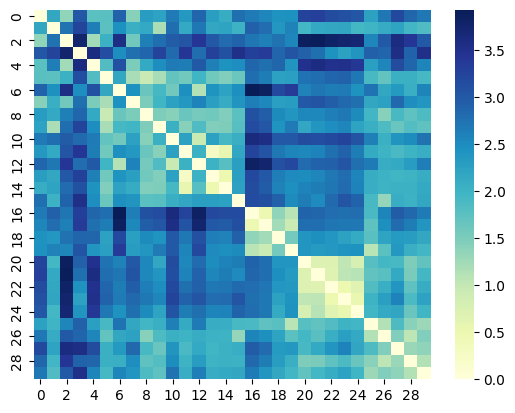

In [113]:
sns.heatmap(mat, cmap="YlGnBu")